# Clasificación No Convecional
## Práctica 0
Carlos Checa Moreno

# **Ejercicio 1**
Contenido del dataset: Candidatos a púlsar obtenidos mediante la exploración HTRU. Los púlsares son un tipo de estrella, de considerable interés científico. Los candidatos deben estar clasificados en clases pulsar y no pulsar para facilitar el descubrimiento.
El ejercicio consiste obtener un modelo de clasificación para clasificar en pulsar (clase positiva) y no pulsar (clase negativa).
El dataset está en formato csv, contiene 8 atributos y la clase. No aparecen los nombres de los atributos en la primera línea del dataset. En el código suministrado se resuelve este problema.

*   URL: https://archive.ics.uci.edu/ml/datasets/HTRU2
*   URL Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip

**Tomando como base el ejemplo1 de los suministrados en clase**, implementar un clasificador basado en el descenso de gradiente estocástico (SGDClassifier), que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases están desbalanceadas,
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.
Utilizando el mismo dataset implementar clasificadores basados en Regresión Logística, SVM lineal y K vecinos más cercanos. Realizando

Toda la parte del descarga y preparación del dataset se suministra en este archivo.

In [ ]:
import pandas as pd

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/HTRU2   este es bueno para usar en la práctica  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/

In [ ]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
unzip HTRU2.zip

Archive:  HTRU2.zip
  inflating: HTRU_2.csv              
  inflating: HTRU_2.arff             
  inflating: Readme.txt              


--2025-01-21 17:44:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘HTRU2.zip’

     0K .......... .......... .......... .......... ..........  391K
    50K .......... .......... .......... .......... ..........  775K
   100K .......... .......... .......... .......... .......... 1.23M
   150K .......... .......... .......... .......... .......... 1.97M
   200K .......... .......... .......... .......... .......... 60.6M
   250K .......... .......... .......... .......... .......... 1.27M
   300K .......... .......... .......... .......... .......... 1.96M
   350K .......... .......... .......... .......... .......... 35.5M
   400K .......... .......... .......... .......... ..........  781K
   450K .......... ..........

In [ ]:
htru2 = pd.read_csv("/content/HTRU_2.csv", header = 0, names = ["MEAN_IP", "SD_IP", "EK_IP", "S_IP", "MEAN_DN-SNR", "SD_DM-SNR", "EK_DM-SNR", "S_DM-SNR", "label"])
#Para añadir nombres a los atributos cuando no aparecen en el archivo csv

In [ ]:
htru2.head()

,MEAN_IP,SD_IP,EK_IP,S_IP,MEAN_DN-SNR,SD_DM-SNR,EK_DM-SNR,S_DM-SNR,label
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [ ]:
htru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEAN_IP      17897 non-null  float64
 1   SD_IP        17897 non-null  float64
 2   EK_IP        17897 non-null  float64
 3   S_IP         17897 non-null  float64
 4   MEAN_DN-SNR  17897 non-null  float64
 5   SD_DM-SNR    17897 non-null  float64
 6   EK_DM-SNR    17897 non-null  float64
 7   S_DM-SNR     17897 non-null  float64
 8   label        17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
htru2_labels = htru2["label"] #Guardamos etiquetas aparte

In [ ]:
htru2_data = htru2.drop("label", axis = 1) #Eliminamos la etiqueta

In [ ]:
htru2_labels = (htru2_labels == 1) #Cambiamos la etiqueta/clase de 0/1 a True/False

In [ ]:
htru2_labels.head()

,label
0,False
1,False
2,False
3,False
4,False


In [ ]:
htru2_labels.value_counts() #Como se puede ver, las clases están desbalanceadas y habrá que tenerlo en cuenta

,count
label,
False,16258
True,1639


In [ ]:
# Separar instancias X y sus etiquetas y
X = htru2.iloc[:, :-1]
y = htru2.iloc[:, -1]

# Solución Ejercicio 1

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.linear_model import SGDClassifier
# Entrenar un modelo Random Forest
sgd_clasificador = make_pipeline(StandardScaler(), SGDClassifier(random_state = 42))

In [64]:
from sklearn.model_selection import train_test_split
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
sgd_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [66]:
# Realizar predicciones
y_pred = sgd_clasificador.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
y_pred = sgd_clasificador.predict(X_test)
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

In [68]:
cm

array([[3226,   26],
       [  53,  275]])

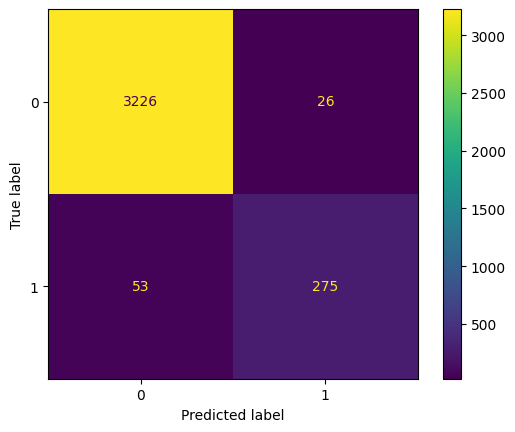

In [69]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test, y_pred), "\nPrecision: ",precision_score(y_test, y_pred),
      "\nRecall:", recall_score(y_test, y_pred),"\nF1: ", f1_score(y_test, y_pred))

Accuracy:  0.9779329608938547 
Precision:  0.9136212624584718 
Recall: 0.8384146341463414 
F1:  0.8744038155802861


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


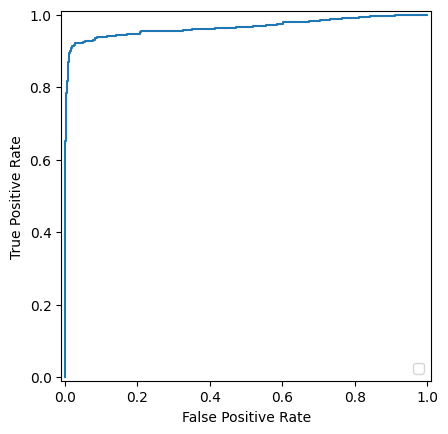

In [71]:
# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay
y_score = sgd_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [35]:
print("Área bajo la curva roc: ",roc_auc_score(y_test, y_score))

Área bajo la curva roc:  0.9517167412743429


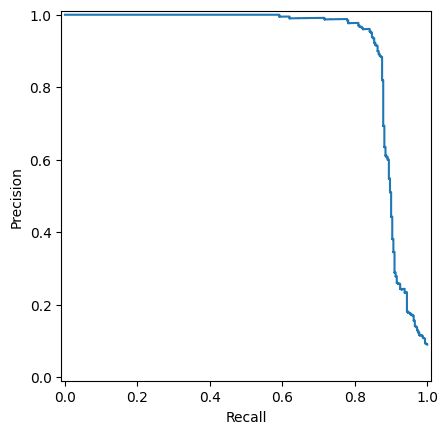

In [36]:
# Curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### Párrafo explicativo


Para resolver este ejercicio se ha tomado como referencia el código de ejemplo aportado en Moodle "Ejemplo1_Mnist_SGDC". He comenzado declarando el clasificador en su respectivo pipeline junto al StandardScaler para preprocesar los datos.

Después se han dividido los datos  en conjuntos de entrenamiento y test. Se ha usado la opción stratify para dividir los datos en conjuntos que mantengan una misma proporción de clases en los diferentes splits. Esta opción es especialmente importante ante un problema con clases desbalanceadas como es el caso.

A continuación, se han obtenido las métricas de evaluación del modelo.
*   Con un accuracy de 0.977 podemos ver que nuestro modelo es bueno clasificando correctamente (tanto clase positiva como negativa).
*   La precisión de 0.913 indica que las predicciones para la clase positiva del modelo han sido muy buenas. La diferencia con el menor accuracy puede indicar que el modelo ha perdido accuracy al clasificar incorrectamente instancias de clases negativas.
*   Por la parte del recall, obtenemos un valor más bajo de 0.838. El modelo ha predecido como clase negativa muchas instancias que no lo eran.
*   En cuanto al F1, al presentar un accuracy y precision altos también sale alta. Pues esta medida penaliza la diferencia entre ambas métricas.

En este caso la métrica más interesante es el recall. En relación con la alta precisión, podemos asumir que el modelo simplemente predice como clase negativa la mayoría de veces, ya que tenemos un dataset desbalanceado. El modelo es muy bueno prediciendo no pulsar, pero falla bastante más clasificando pulsar.

### Otros Clasificadores

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
clasificadores = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Linear SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}
results = {}

Resultados Finales:

Clasificador: Logistic Regression
  Accuracy: 0.98
  Precision: 0.91
  Recall: 0.83
  F1-score: 0.87
  AUC: 0.91

Clasificador: Linear SVM
  Accuracy: 0.98
  Precision: 0.92
  Recall: 0.82
  F1-score: 0.87
  AUC: 0.91

Clasificador: KNN
  Accuracy: 0.98
  Precision: 0.91
  Recall: 0.85
  F1-score: 0.88
  AUC: 0.92



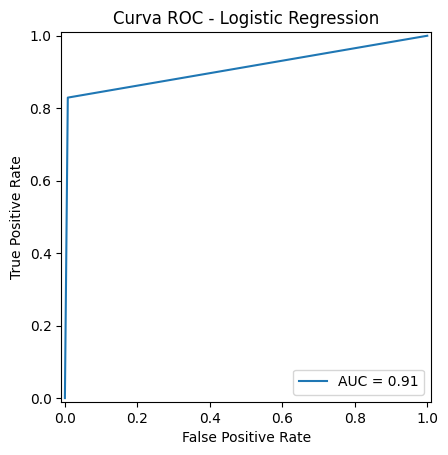

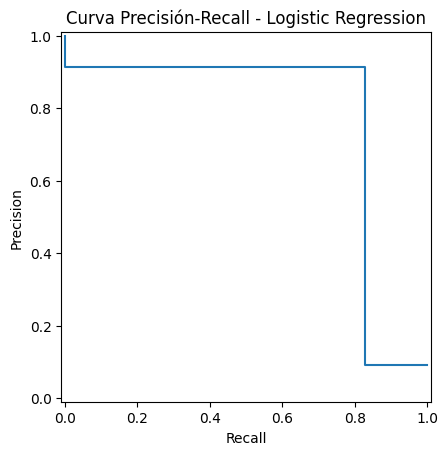

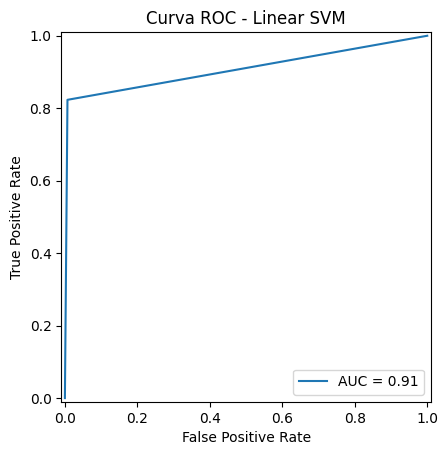

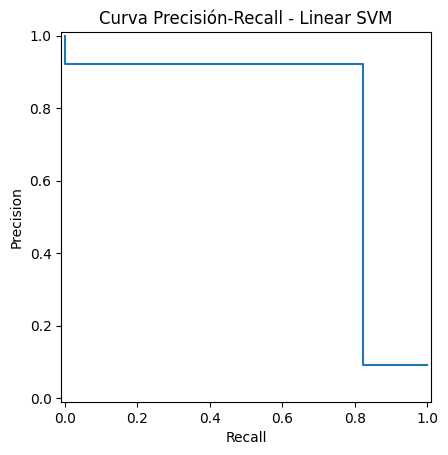

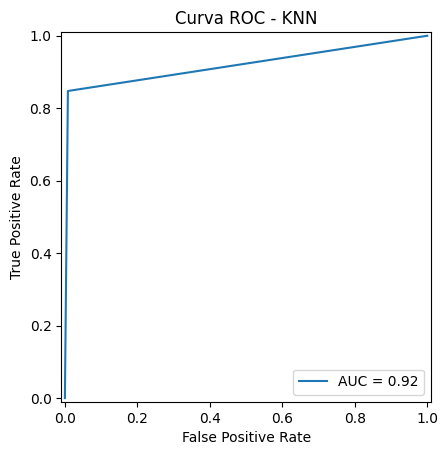

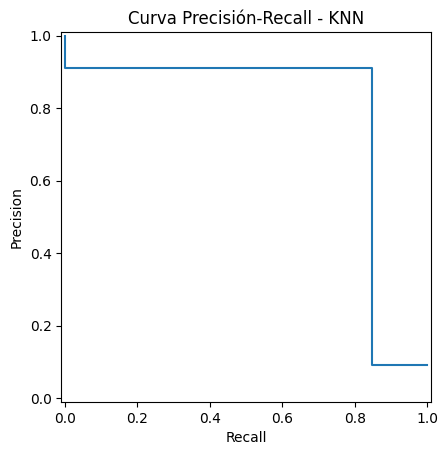

In [62]:
for name, clf in clasificadores.items():
    # Crear el pipeline
    classifier = make_pipeline(StandardScaler(), clf)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Curvas ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Curvas de precisión-recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
        "precision_curve": precision,
        "recall_curve": recall
    }

    # Graficar curva ROC usando RocCurveDisplay
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()
    roc_display.ax_.set_title(f"Curva ROC - {name}")

    # Graficar curva de precisión-recall usando PrecisionRecallDisplay
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    pr_display.ax_.set_title(f"Curva Precisión-Recall - {name}")

# Resumen de resultados
print("Resultados Finales:\n")
for name, metrics in results.items():
    print(f"Clasificador: {name}")
    print(f"  Accuracy: {metrics['accuracy']:.2f}")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall: {metrics['recall']:.2f}")
    print(f"  F1-score: {metrics['f1']:.2f}")
    print(f"  AUC: {metrics['auc']:.2f}\n")